In [42]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargamdo los datos en un dataframe para realizar el EDA

In [2]:
#Homicidios:

hom = pd.read_excel("bases_de_datos/homicidios.xlsx")

In [3]:
les = pd.read_excel("bases_de_datos/lesiones.xlsx")

Checkeando valores duplicados:

In [4]:
hom.duplicated().sum() #No hay duplicados

0

In [5]:
les.duplicated().sum() #No hay duplicados

0

Checkeando valores vacios:

In [6]:
hom.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [25]:
hom[hom["Altura"].isna()==True].head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


Siendo que la columna "Direccion normalizada" tiene muy pocos valores nulos y nos proporciona toda la informacion que necesitamos en un formato unificado vamos a dejar unicamente esa

In [45]:
hom.drop(columns=["Cruce", "Altura", "LUGAR_DEL_HECHO"], inplace=True)

In [7]:
les.isna().sum()

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  5
direccion_normalizada       53
comuna                     169
tipo_calle                   0
otra_direccion               0
calle                    10918
altura                   11014
cruce                    14378
geocodificacion_CABA        39
longitud                   262
latutid                    262
victima                      0
acusado                      0
participantes                0
moto                        93
auto                        93
transporte_publico          93
camion                      93
ciclista                    93
gravedad                     0
dtype: int64

Checkeando data types en cada columna:

In [8]:
for i in hom.columns: print(f"{i}: {hom[i].dtype}")

ID: object
N_VICTIMAS: int64
FECHA: datetime64[ns]
AAAA: int64
MM: int64
DD: int64
HORA: object
HH: object
LUGAR_DEL_HECHO: object
TIPO_DE_CALLE: object
Calle: object
Altura: float64
Cruce: object
Dirección Normalizada: object
COMUNA: int64
XY (CABA): object
pos x: object
pos y: object
PARTICIPANTES: object
VICTIMA: object
ACUSADO: object


In [37]:
print(("{0:20}{1:20}{2:20}".format("object","int","float")))
for i in les.columns:
    o = ""
    n = ""
    f = ""
    if les[i].dtype == "object":
        o = i 

    elif les[i].dtype == "int64":
        n = i
    
    elif les[i].dtype == "float64":
        f = i
    
    
    print("{0:20}{1:20}{2:20}".format(o,n,f))

object              int                 float               
id                                                          
                    n_victimas                              
                    aaaa                                    
                    mm                                      
                    dd                                      
fecha                                                       
hora                                                        
franja_hora                                                 
direccion_normalizada                                        
comuna                                                      
tipo_calle                                                  
otra_direccion                                              
calle                                                       
                                        altura              
cruce                                                       
geocodificacion_CABA   

Tipo de cada variable:

### NUMERICAS:       

* N_VICTIMAS (discreta)
* FECHA (temporal)
* AAAA  (temporal)
* MM    (temporal)
* DD    (temporal)
* HORA  (temporal)
* HH    (discreta)
* XY (CABA) (continua)
* pos x (continua)
* pos y (continua)



### CATEGORICAS: 

* ID    (Nominal)
* TIPO_DE_CALLE     (Nominal)
* Calle     (Nominal)
* Dirección Normalizada (Nominal)
* COMUNA    (Nominal)
* PARTICIPANTES (Nominal)
* VICTIMA   (Nominal)
* ACUSADO   (Nominal)


## Outliers:

Debido a un error a la hora de graficar sale a la luz un unico valor fuera de norma en la representacion de la hora, para poder graficar eliminaremos esta fila

In [59]:
hom[hom["HH"]=="SD"]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [58]:
hom.drop([518],inplace=True)

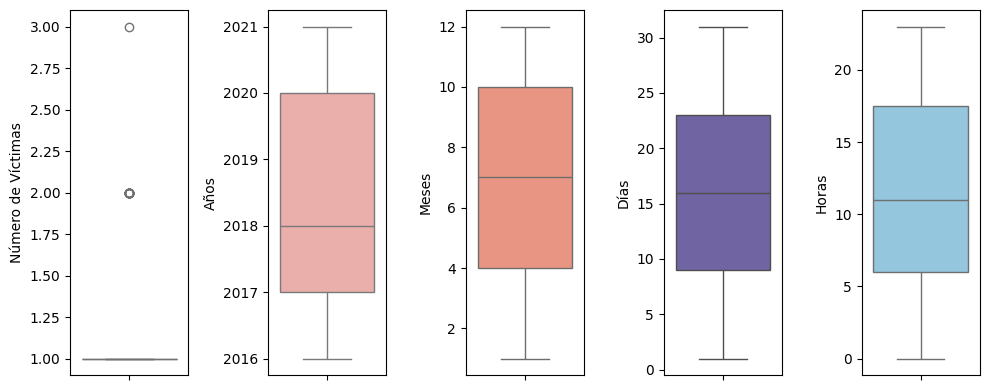

In [69]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=hom, y='N_VICTIMAS', color = "#FA80A2")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=hom, y='AAAA', color = "#F4A4A0")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=hom, y='MM', color = "#FA8A72")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=hom, y='DD', color = "#6A5AAD")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=hom, y='HH', color = "#87CAEB")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Donde podemos encontrar outliers es en el numero de victimas, el cual tiende a ser 1 pero puede pasar a 2 o 3 

## Distribucion de fatalidades en el tiempo 

In [77]:
hom['FECHA_FORMATEADA'] = hom['FECHA'].dt.strftime('%Y-%m')
# Agrupar por año y mes, y sumar el número de víctimas
hom_temporal = hom.groupby(["FECHA_FORMATEADA"])['N_VICTIMAS'].sum().reset_index()

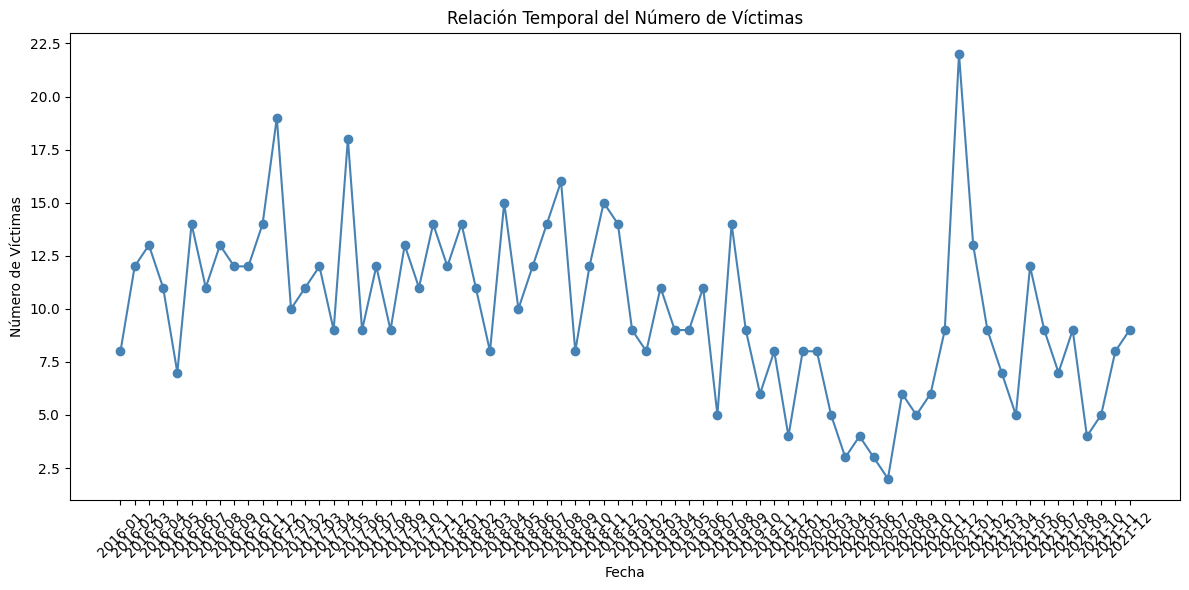

In [80]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(hom_temporal["FECHA_FORMATEADA"], hom_temporal["N_VICTIMAS"], marker='o', color='steelblue')

# Añadir títulos y etiquetas
plt.title('Relación Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



En la distribucion se pueden observar una caida inusual de accidentes fatales en 2020 que se explica por el confinamiento que fue respuesta a la pandemia de coronavirus, y luego casi ironicamente se observa el record historico (al menos de esta base de datos) en accidentes fatales justamente al año siguiente del minimo.